# Pima Indians Diabetes – Logistic Regression Practice  

This notebook is designed to practice Logistic Regression using the Pima Indians Diabetes Dataset.  


## 📊 Dataset Overview  

- **Source**: UCI Machine Learning Repository  
- **출처**: UCI Machine Learning Repository  


- **Problem**: A binary classification problem to predict diabetes based on health information of Pima Indian women.  
- **문제**: 피마 인디언 여성의 건강 정보를 바탕으로 당뇨병 여부를 예측하는 이진 분류 문제.  


- **Number of Features**: 8  
- **특성 수**: 8  


- **Target Variable**: Diabetes status (1 = Diabetes, 0 = No Diabetes)  
- **목표 변수**: 당뇨병 유무 (1 = 있음, 0 = 없음)  


## 📥 Data Download  

The data can be downloaded from the link below:  

🔗 <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database" target="_blank">https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database</a>


Alternatively, you can use a locally saved CSV file named `07_2_diabetes.csv`.  
또는 `07_2_diabetes.csv`라는 이름으로 로컬에 저장된 CSV 파일 사용 가능.  

## 📂 Load Data  

In [1]:
import pandas as pd

df = pd.read_csv('07_2_diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## 🧪 Split train/test dataset 

In [2]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Learn Logistic Model

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 📈 Prediction & Evaluation

In [4]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


## 📊 Visualization (matplotlib)

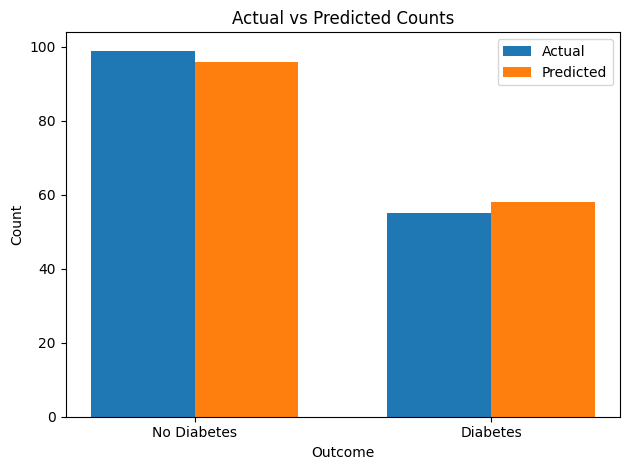

In [5]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['No Diabetes', 'Diabetes']
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, actual_counts, width, label='Actual')
ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()